In [294]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
data='breast-cancer.csv'
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [295]:
"""
Use mapping technique to convert from categorical to numerical (binary) in order to fit models.
Feature select our most representative variables 'mean vars' without being overly complicating our models (with all vars).
Avoids overfitting.
"""

df = pd.read_csv(data,  sep=',')
df = df.iloc[:, :7]
df_breast_cancer = df.copy()
df_breast_cancer['diagnosis'] = df_breast_cancer.diagnosis.map({'M':0, 'B': 1})

In [296]:
df_breast_cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean
0,842302,0,17.99,10.38,122.80,1001.0,0.11840
1,842517,0,20.57,17.77,132.90,1326.0,0.08474
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960
3,84348301,0,11.42,20.38,77.58,386.1,0.14250
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030
...,...,...,...,...,...,...,...
564,926424,0,21.56,22.39,142.00,1479.0,0.11100
565,926682,0,20.13,28.25,131.20,1261.0,0.09780
566,926954,0,16.60,28.08,108.30,858.1,0.08455
567,927241,0,20.60,29.33,140.10,1265.0,0.11780


/var/folders/lc/prdjgf0d6hb4tg221lphh9cc0000gn/T/ipykernel_95664/4251579322.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df_breast_cancer, palette='RdBu')


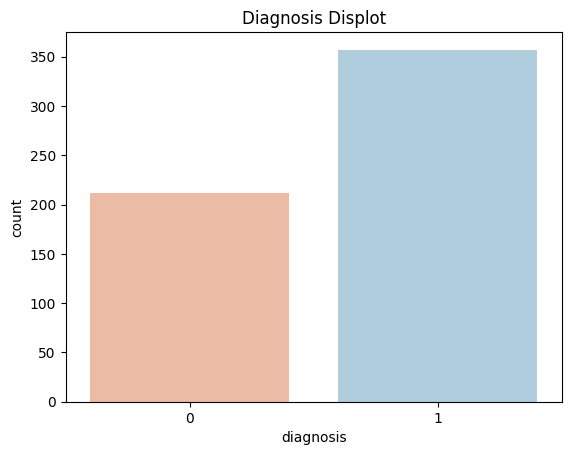

In [297]:
sns.countplot(x='diagnosis', data=df_breast_cancer, palette='RdBu')
plt.title('Diagnosis Displot')
plt.show()

In [298]:
df_breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               569 non-null    int64  
 1   diagnosis        569 non-null    int64  
 2   radius_mean      569 non-null    float64
 3   texture_mean     569 non-null    float64
 4   perimeter_mean   569 non-null    float64
 5   area_mean        569 non-null    float64
 6   smoothness_mean  569 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 31.2 KB


In [299]:
df_breast_cancer.isnull().sum()

id                 0
diagnosis          0
radius_mean        0
texture_mean       0
perimeter_mean     0
area_mean          0
smoothness_mean    0
dtype: int64

In [300]:
df_breast_cancer.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.627417,14.127292,19.289649,91.969033,654.889104,0.096360
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370
50%,9.060240e+05,1.000000,13.370000,18.840000,86.240000,551.100000,0.095870
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400


In [301]:
"""
We want to get diagnosis as the y (target) and X as our predictors (independent vars)
"""

X = df_breast_cancer.iloc[:, 2:7]
y = df_breast_cancer.iloc[:, 1]

In [302]:
"""
Stratifying by the target variable is important as we want the same balance of Positives and Negatives in our
testing and training, as an imbalance could damage our false positive rate, which our objective is to keep low.
"""

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3,random_state=1234, stratify = y)

In [303]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean
427,10.80,21.98,68.79,359.9,0.08801
365,20.44,21.78,133.80,1293.0,0.09150
500,15.04,16.74,98.73,689.4,0.09883
231,11.32,27.08,71.76,395.7,0.06883
320,10.25,16.18,66.52,324.2,0.10610
...,...,...,...,...,...
537,11.69,24.44,76.37,406.4,0.12360
213,17.42,25.56,114.50,948.0,0.10060
370,16.35,23.29,109.00,840.4,0.09742
490,12.25,22.44,78.18,466.5,0.08192


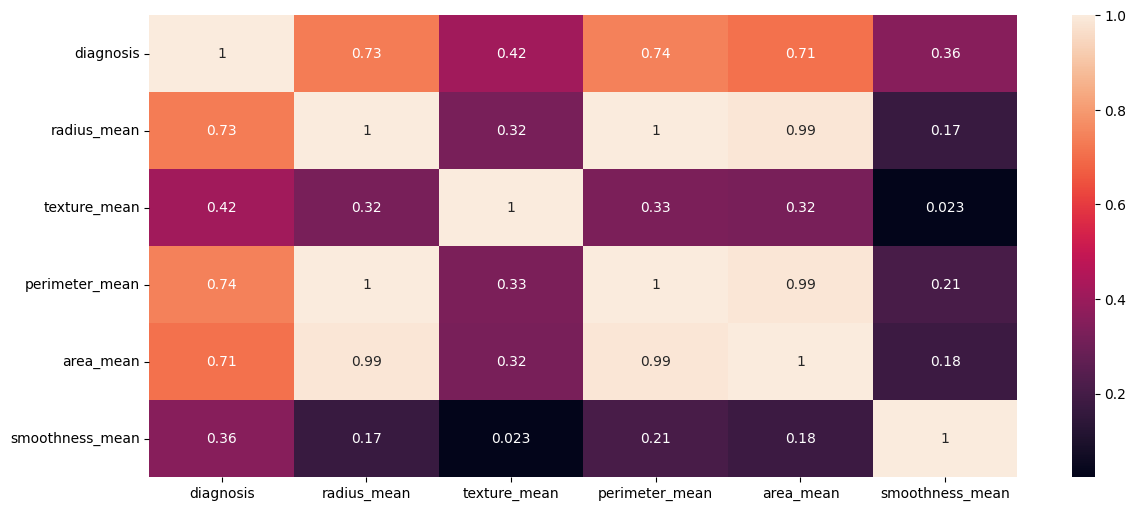

In [304]:
"""
We don't need the id column
Displays multi-collinearity. However, we will not apply any dimensionality reduction techniques as we want to keep the entirety
of the data's variance and complexity.
"""

plt.figure(figsize=(14, 6))
sns.heatmap(df_breast_cancer.iloc[:, 1:].corr().abs(), annot=True);

In [305]:
"""
All our cols are numeric already
"""

X_train.dtypes

radius_mean        float64
texture_mean       float64
perimeter_mean     float64
area_mean          float64
smoothness_mean    float64
dtype: object

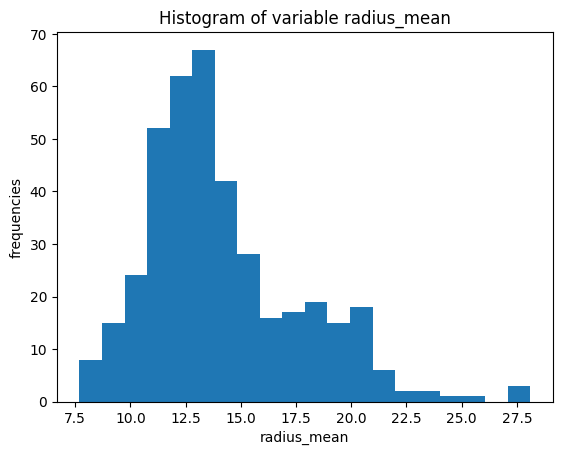

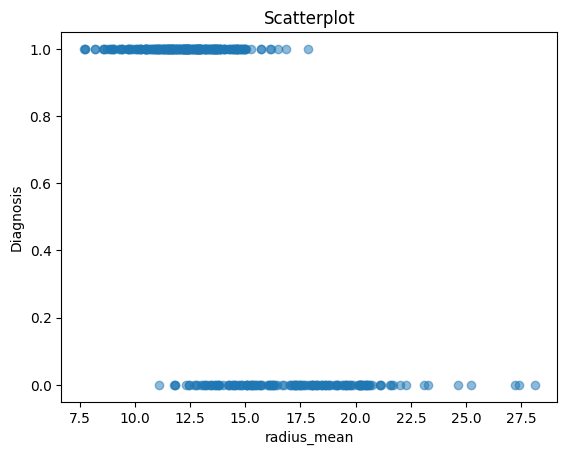

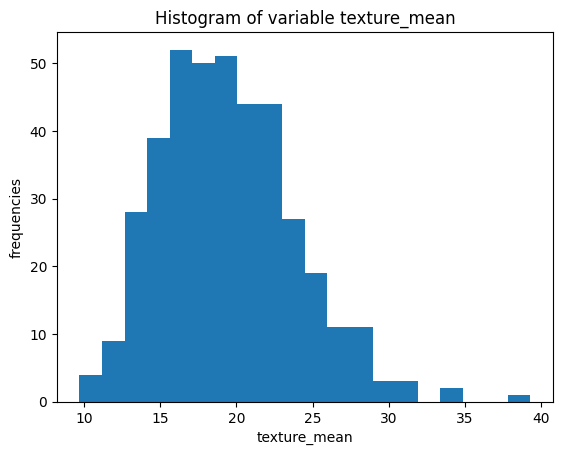

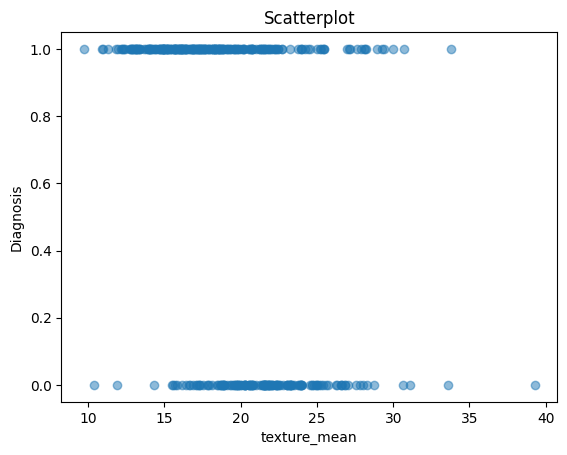

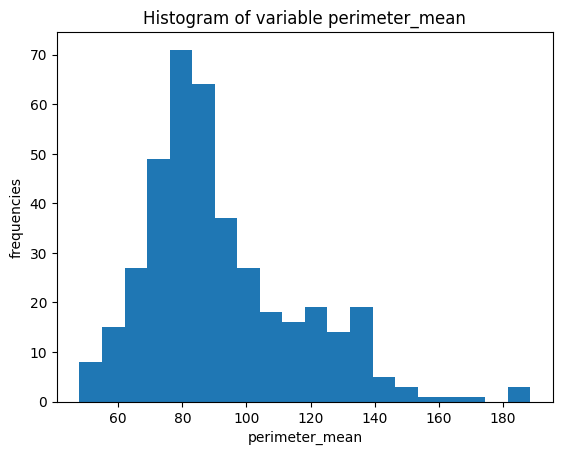

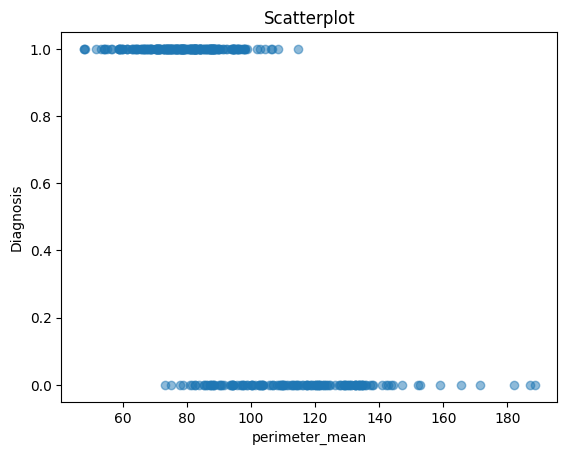

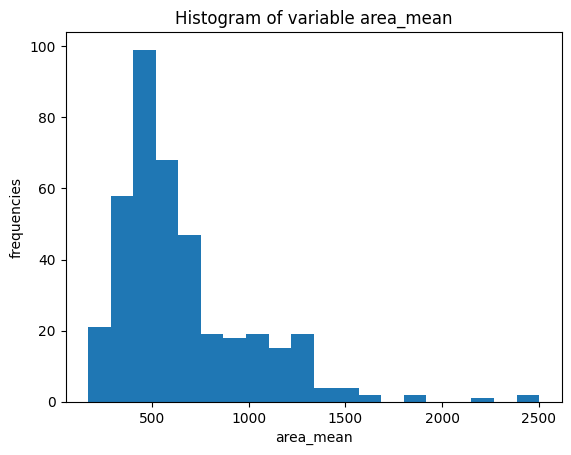

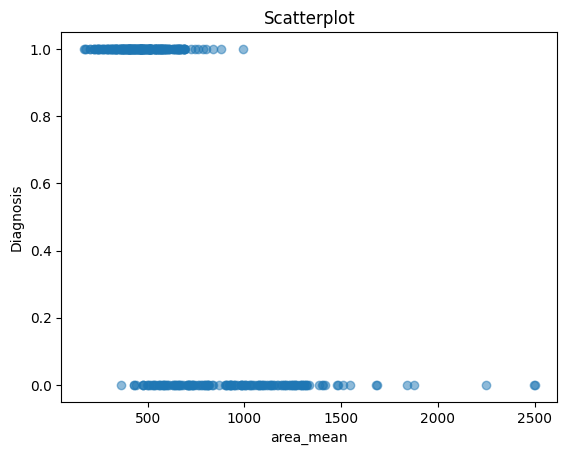

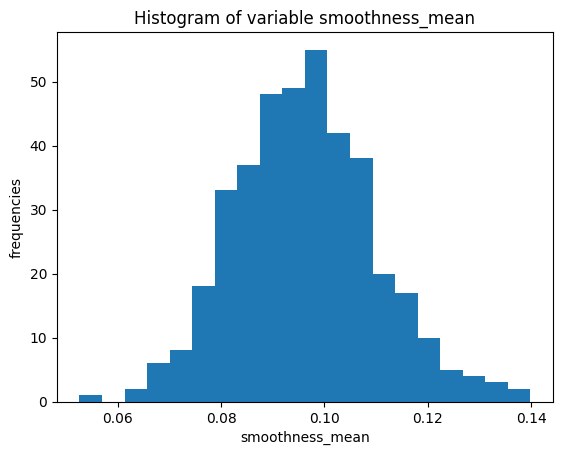

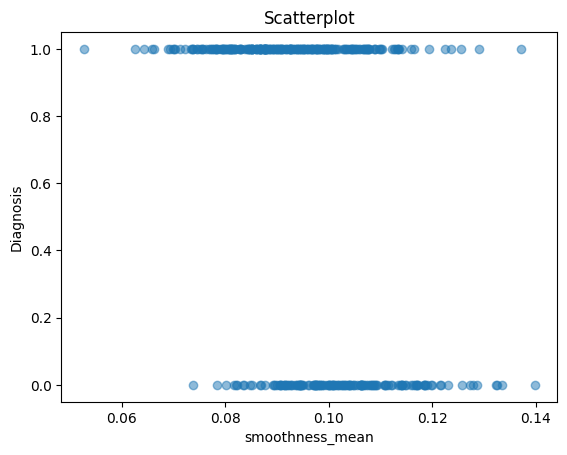

In [306]:
for col in X_train.columns:
    plt.figure()
    plt.hist(X_train[col],bins=20)
    plt.title('Histogram of variable '+col)
    plt.xlabel(col)
    plt.ylabel('frequencies')
    plt.figure()
    plt.scatter(X_train[col], y_train,  alpha=0.5)
    plt.title('Scatterplot')
    plt.xlabel(col)
    plt.ylabel('Diagnosis')

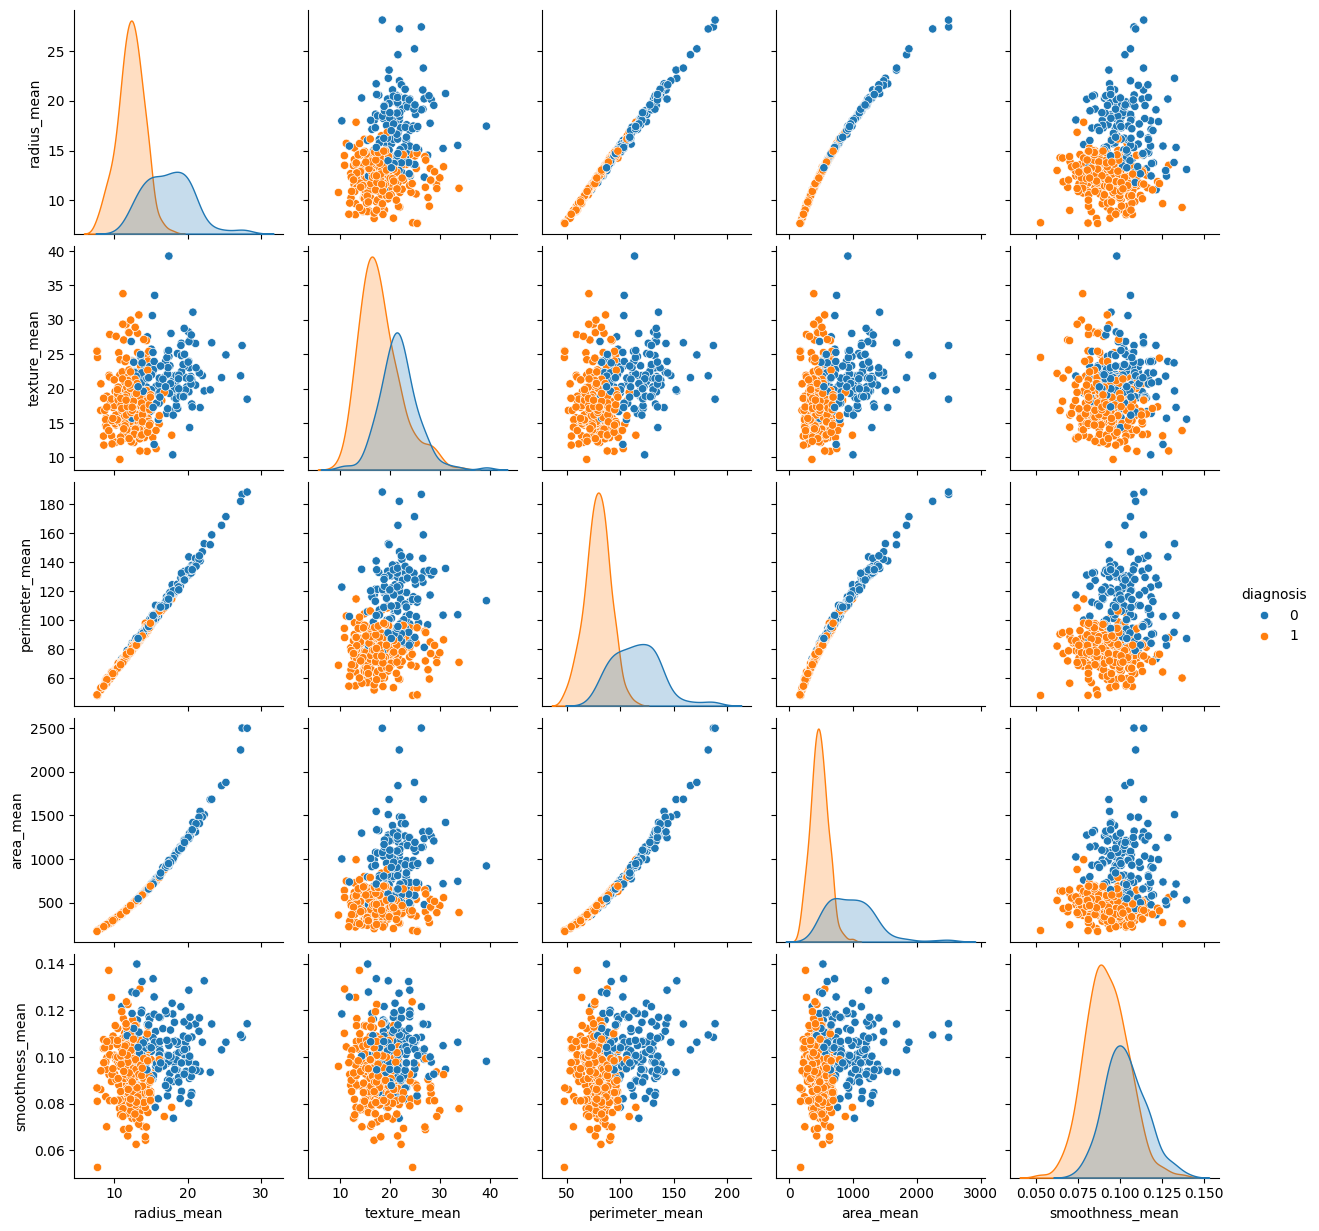

In [307]:
"""
We see how on average the mean of each feature is significantly higher when the patient's tumor is malignant (0)
"""

df_tr = pd.concat([X_train, y_train], axis=1).reset_index()
df_tr=df_tr.drop(columns='index')
sns.pairplot(df_tr, hue = "diagnosis")
plt.show()

In [308]:
"""
Use for plotting all model confus. matrix.
"""

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def plot_cm(test_y,predicted):
    cm=confusion_matrix(y_true=test_y,y_pred=predicted)
    accuracy = accuracy_score(test_y, predicted)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r',cbar=False);
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = f'Accuracy Score: {accuracy}'
    plt.title(all_sample_title, size = 15)
    plt.show()  

In [309]:
"""
Use for plotting all model metrics.
"""

def Metrics(y_true,y_pred,data='train'):
    print('The metrics for the {} dataset are:'.format(data))
    print('Precision: %.3f' % precision_score(y_true, y_pred))
    print('Recall: %.3f' % recall_score(y_true, y_pred))
    print('Accuracy: %.3f' % accuracy_score(y_true, y_pred))
    print('F1 Score: %.3f' % f1_score(y_true, y_pred))
    print()
    print()
    print()

In [310]:
"""
Use for plotting all model ROC cruves
"""

def roc_curve(fitted_model, X_train, y_train):
    #define metrics
    y_pred_proba = fitted_model.predict_proba(X_train)[::,1]
    fpr, tpr,  thresholds = metrics.roc_curve(y_train,  y_pred_proba)
    auc = metrics.roc_auc_score(y_train, y_pred_proba)
    #we may want to optimize a metric, for example the square root of the (tpr*(1-fpr))
    gmeans = np.sqrt(tpr * (1-fpr))
    ix = np.argmax(gmeans)
    print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
    #create ROC curve
    plt.plot(fpr,tpr,label="AUC="+str(auc))
    plt.plot([0,1], [0,1], linestyle='--', label='Random')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
    plt.legend(loc=4)
    plt.show()

# Naive Bayes classification

In [311]:
from sklearn.naive_bayes import GaussianNB

In [312]:
n_bayes = GaussianNB()
n_bayes.fit(X_train, y_train)
y_predict = n_bayes.predict(X_test)

In [313]:
print(classification_report(y_test, y_predict_2))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88        64
           1       0.90      0.98      0.94       107

    accuracy                           0.92       171
   macro avg       0.93      0.90      0.91       171
weighted avg       0.92      0.92      0.92       171



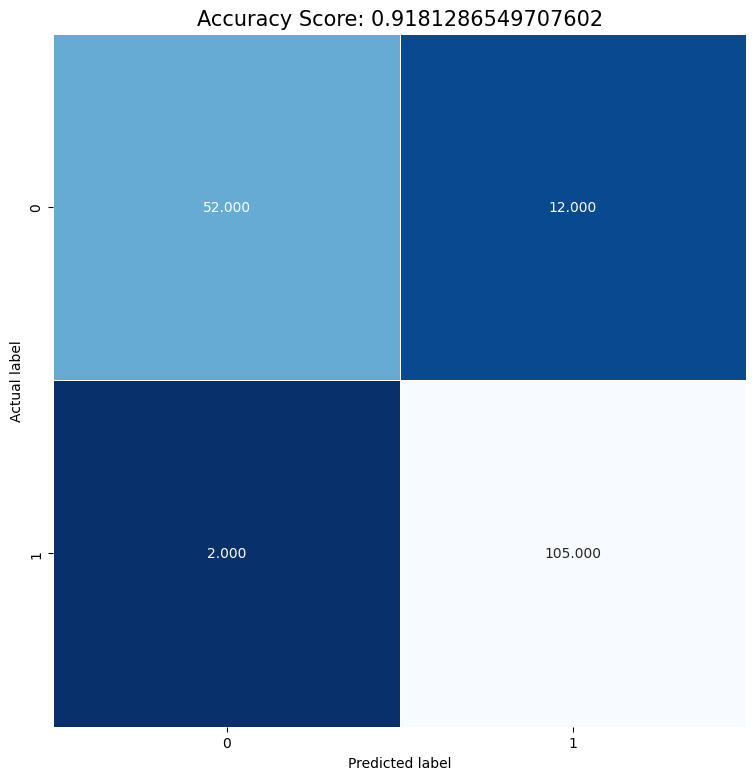

In [314]:
plot_cm(y_test,y_predict_2)

Best Threshold=0.830146, G-Mean=0.880


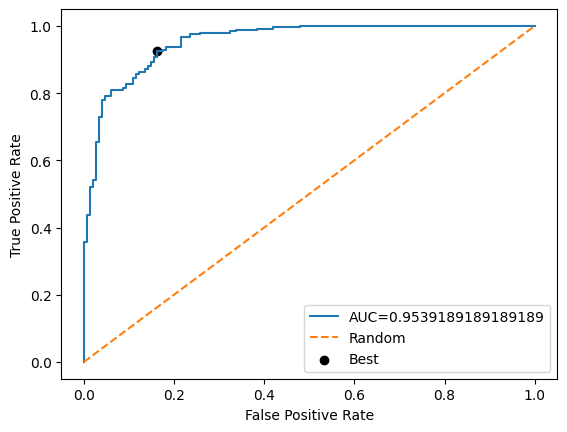

In [315]:
roc_curve(n_bayes, X_train, y_train)

# Logistic Regression

In [316]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [317]:
preds_test = logistic_model.predict(X_test)
preds_train = logistic_model.predict(X_train)
Metrics(y_train,preds_train,data='train')
Metrics(y_test,preds_test,data='test')

The metrics for the train dataset are:
Precision: 0.914
Recall: 0.936
Accuracy: 0.905
F1 Score: 0.925



The metrics for the test dataset are:
Precision: 0.929
Recall: 0.972
Accuracy: 0.936
F1 Score: 0.950





In [318]:
y_predict = logistic_model.predict(X_test)

In [319]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91        64
           1       0.93      0.97      0.95       107

    accuracy                           0.94       171
   macro avg       0.94      0.92      0.93       171
weighted avg       0.94      0.94      0.94       171



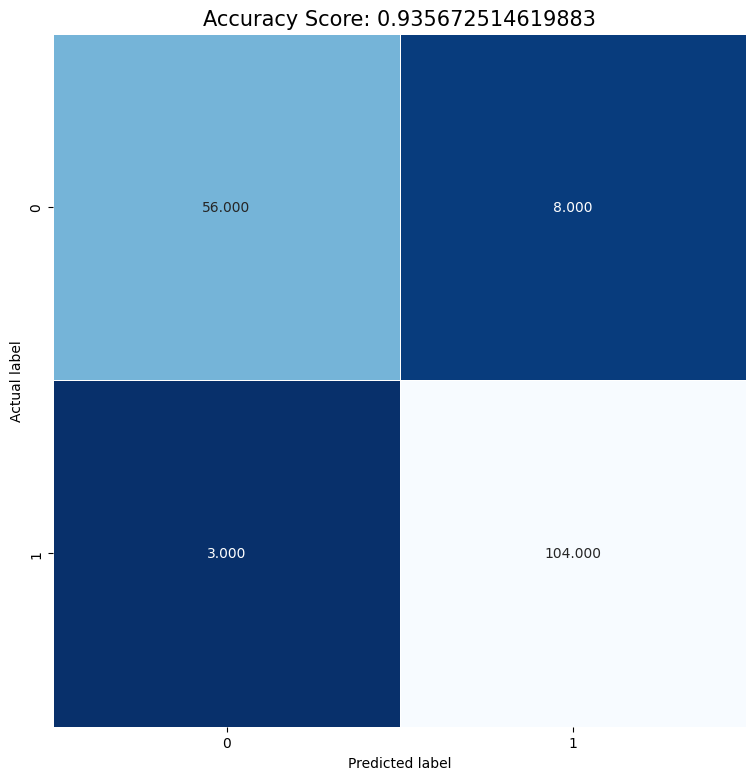

In [320]:
plot_cm(y_test,y_predict)

Best Threshold=0.682384, G-Mean=0.915


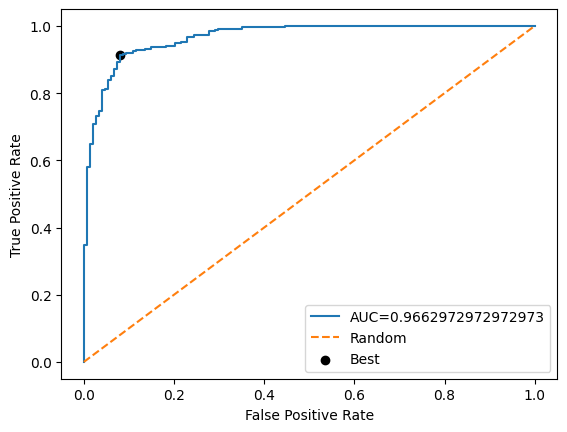

In [321]:
roc_curve(logistic_model, X_train, y_train)

# KNN

In [322]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [323]:
y_predict = knn.predict(X_test)

In [324]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89        64
           1       0.91      0.98      0.94       107

    accuracy                           0.92       171
   macro avg       0.93      0.90      0.92       171
weighted avg       0.93      0.92      0.92       171



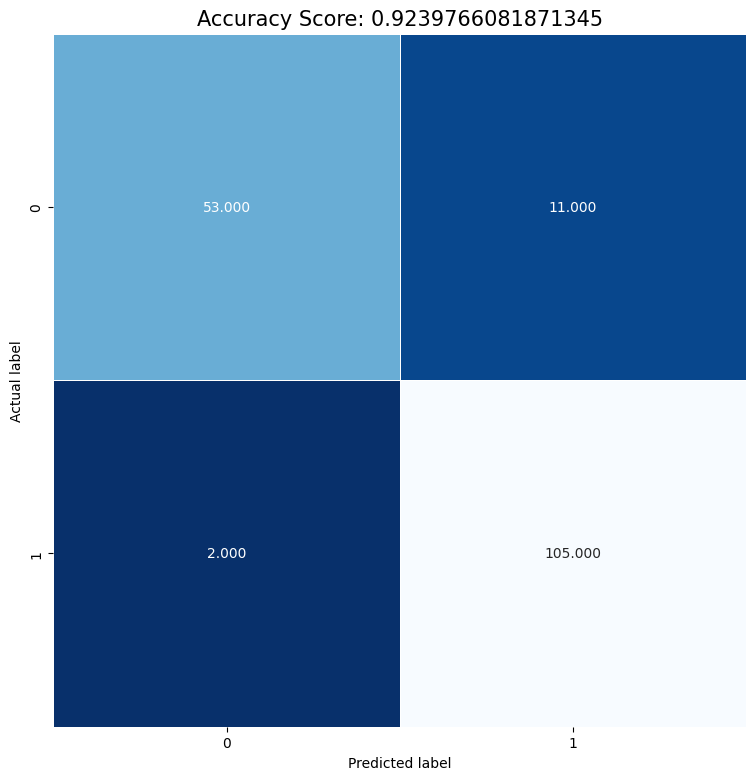

In [325]:
plot_cm(y_test,y_predict)

Best Threshold=0.800000, G-Mean=0.896


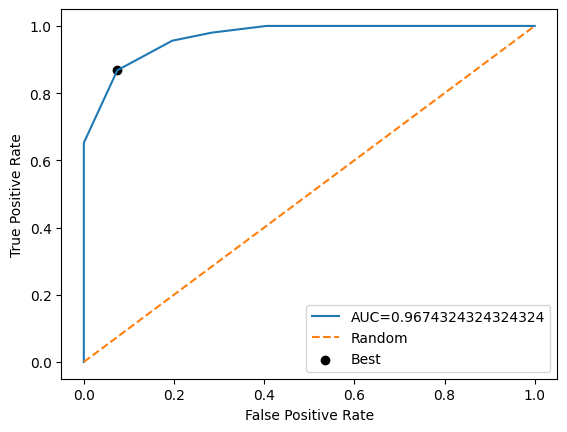

In [326]:
roc_curve(knn, X_train, y_train)

In [327]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 25)}  
knn_cv = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [328]:
print('best param set: '+str(knn_cv.best_params_))
print('best score: '+str(knn_cv.best_score_))

best param set: {'n_neighbors': 15}
best score: 0.8845253164556961


In [329]:
y_predict = knn_cv.predict(X_test)

In [330]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.80      0.87        64
           1       0.89      0.98      0.93       107

    accuracy                           0.91       171
   macro avg       0.93      0.89      0.90       171
weighted avg       0.92      0.91      0.91       171



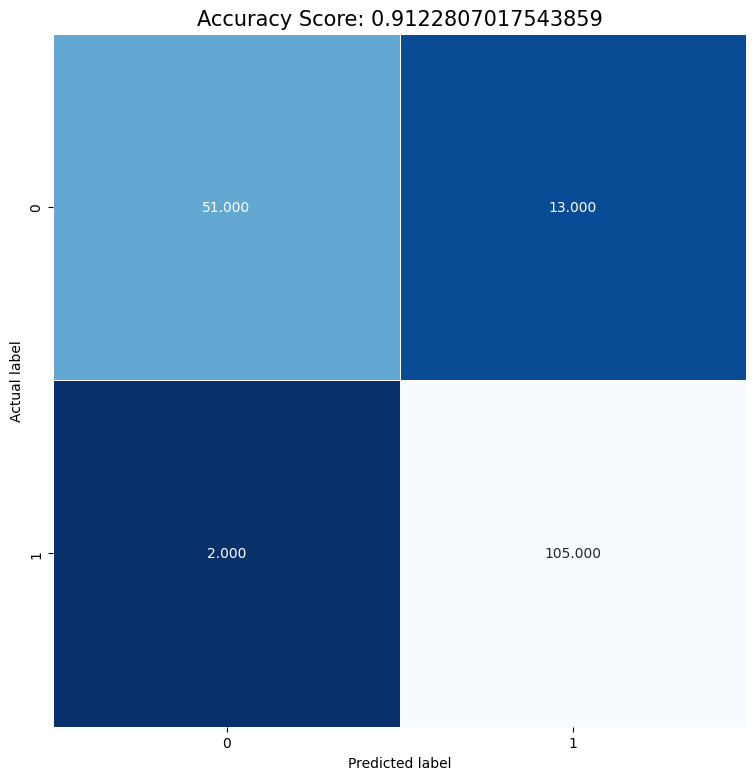

In [331]:
plot_cm(y_test,y_predict)

Best Threshold=0.666667, G-Mean=0.868


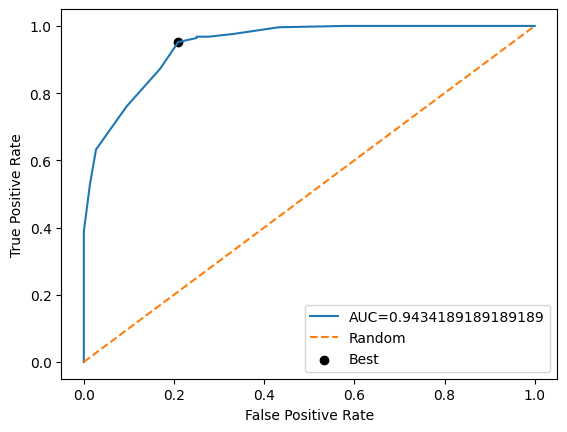

In [332]:
roc_curve(knn_cv, X_train, y_train)

# RANDOM FOREST


In [333]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=12345,stratify=y)
rf = RandomForestClassifier(n_estimators=150, max_depth=5)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=150)

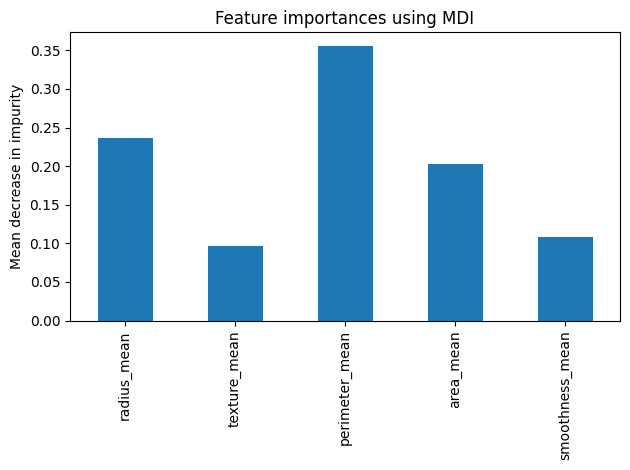

In [334]:
importances = rf.feature_importances_
std = np.std([rf.feature_importances_ for tree in rf.estimators_], axis=0)

forest_importances = pd.Series(importances, index=X_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [335]:
y_predict = rf.predict(X_test)

In [336]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89        64
           1       0.92      0.96      0.94       107

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171



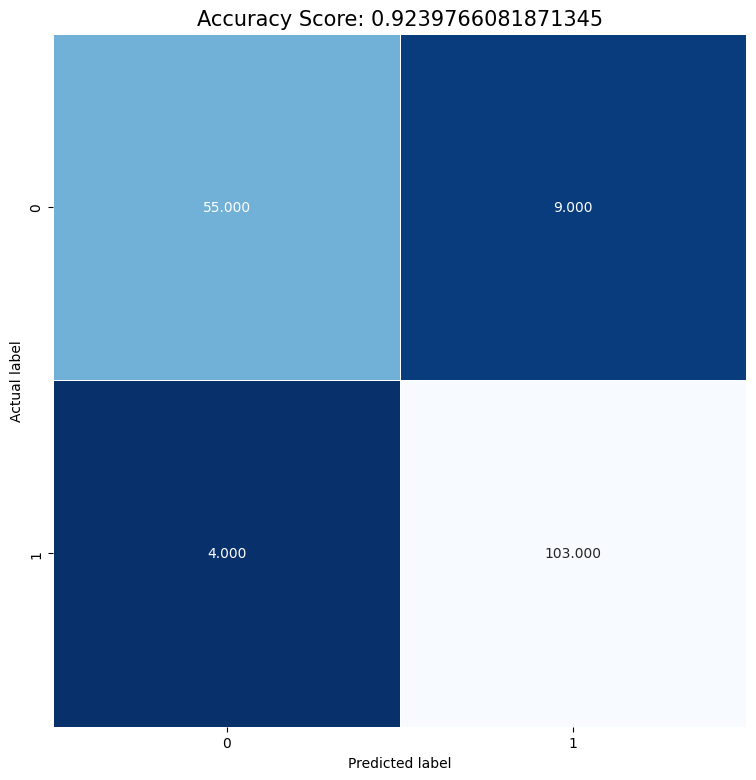

In [337]:
plot_cm(y_test,y_predict)

Best Threshold=0.686660, G-Mean=0.981


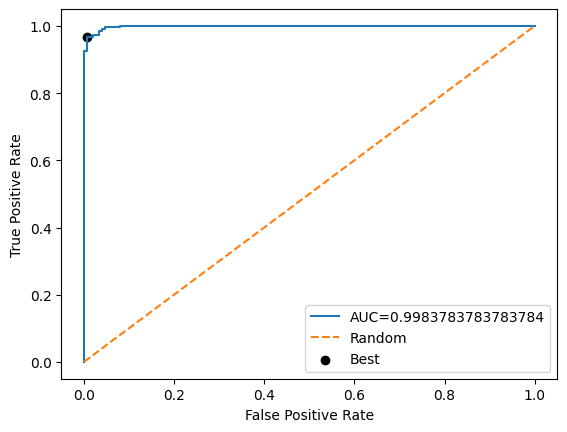

In [338]:
roc_curve(rf, X_train, y_train)

In [339]:
rf_param = {'n_estimators':[100,150,200],
              'criterion':['gini','entropy'],
              'max_depth':[4,5,6,7],
              'min_samples_split':[4,5,6]
             }
rf_cv = GridSearchCV(RandomForestClassifier(random_state=12345), param_grid=rf_param,cv=5)
rf_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=12345),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7],
                         'min_samples_split': [4, 5, 6],
                         'n_estimators': [100, 150, 200]})

In [340]:
best_model_rf=rf_cv.best_estimator_

print(f"Best Estimator: {best_model_rf}")
print(f"Best Estimator Params: {rf_cv.get_params()}")

Best Estimator: RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_split=6,
                       n_estimators=150, random_state=12345)
Best Estimator Params: {'cv': 5, 'error_score': nan, 'estimator__bootstrap': True, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': 'sqrt', 'estimator__max_leaf_nodes': None, 'estimator__max_samples': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__n_estimators': 100, 'estimator__n_jobs': None, 'estimator__oob_score': False, 'estimator__random_state': 12345, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': RandomForestClassifier(random_state=12345), 'n_jobs': None, 'param_grid': {'n_estimators': [100, 150, 200], 'criterion': ['gini', 'entropy'], 'max_depth': [4, 5, 6, 7], 'min_samples_split'

In [341]:
best_model_rf = best_model_rf.fit(X_train, y_train)
y_predict = best_model_rf.predict(X_test)

In [342]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92        64
           1       0.94      0.96      0.95       107

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



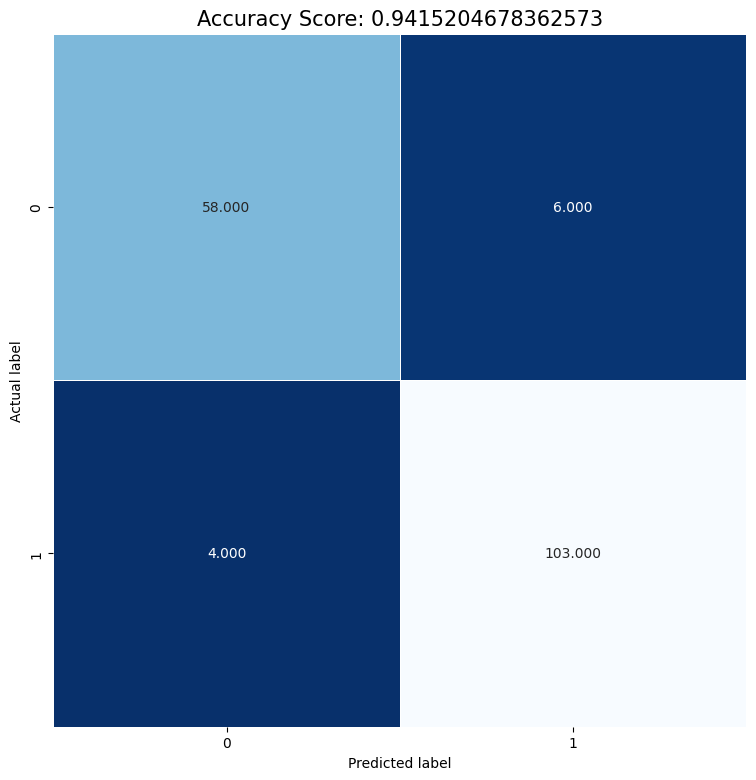

In [343]:
plot_cm(y_test,y_predict)

Best Threshold=0.535448, G-Mean=0.995


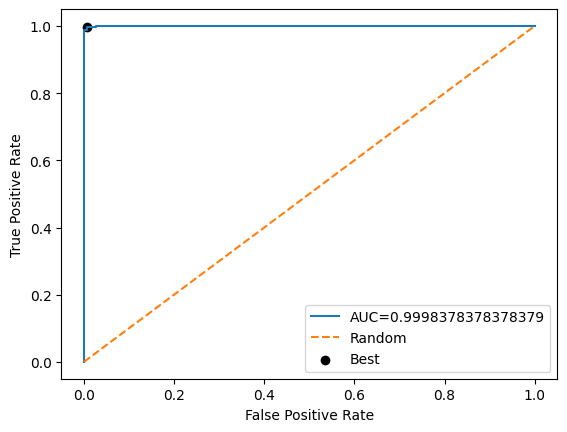

In [344]:
roc_curve(rf_cv, X_train, y_train)